In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [2]:
multi_class = pd.read_parquet('../data/cleaned/multi_class_data.parquet')
binary_class = pd.read_parquet('../data/cleaned/binary_class_data.parquet')

In [3]:
multi_class.columns

Index(['ml_fittype', 'star_id', 'num_of_objects_around_star',
       'right_ascension', 'declination', 'g_band_mag', 'r_band_mag',
       'i_band_mag', 'z_band_mag', 'j_band_mag', 'h_band_mag', 'k_band_mag',
       'kepler_band_mag', 'num_of_transits', 'max_single_event_stat',
       'max_multi_event_stat', 'odd_even_depth_stat', 'limb_dark_co4',
       'limb_dark_co3', 'limb_dark_co2', 'limb_dark_co1',
       'transit_signal_to_noise', 'transit_epoch', 'planet_radius_earth',
       'orbit_semimajor_axis', 'impact', 'transit_duration', 'transit_depth',
       'orbital_period', 'planet_star_radius_ratio',
       'planet_star_distance_radius', 'inclination', 'planet_temp',
       'star_temp', 'star_surface_gravity', 'star_metallicity', 'star_radius',
       'star_mass', 'flux_weight_offset_sig', 'centroid_right_ascension',
       'centroid_declination', 'centroid_right_ascension_offset',
       'centroid_declination_offset', 'planet_star_right_ascension_offset',
       'planet_star_decli

In [36]:
binary_class.columns

Index(['disposition', 'ml_fittype', 'star_id', 'num_of_objects_around_star',
       'right_ascension', 'declination', 'g_band_mag', 'r_band_mag',
       'i_band_mag', 'z_band_mag', 'j_band_mag', 'h_band_mag', 'k_band_mag',
       'kepler_band_mag', 'num_of_transits', 'max_single_event_stat',
       'max_multi_event_stat', 'odd_even_depth_stat', 'limb_dark_co4',
       'limb_dark_co3', 'limb_dark_co2', 'limb_dark_co1',
       'transit_signal_to_noise', 'transit_epoch', 'planet_radius_earth',
       'orbit_semimajor_axis', 'impact', 'transit_duration', 'transit_depth',
       'orbital_period', 'planet_star_radius_ratio',
       'planet_star_distance_radius', 'inclination', 'planet_temp',
       'star_temp', 'star_surface_gravity', 'star_metallicity', 'star_radius',
       'star_mass', 'flux_weight_offset_sig', 'centroid_right_ascension',
       'centroid_declination', 'centroid_right_ascension_offset',
       'centroid_declination_offset', 'planet_star_right_ascension_offset',
       'pl

In [ ]:
sns.pairplot(multi_class)

KeyboardInterrupt: 

In [18]:
highest_corr_multi = multi_class.corr(numeric_only = True).abs().classification.nlargest(11).index.values.tolist()

In [19]:
highest_corr_multi

['classification',
 'angular_offset_sky',
 'num_of_objects_around_star',
 'planet_temp',
 'star_metallicity',
 'flux_weight_offset_sig',
 'num_of_transits',
 'transit_depth',
 'inclination',
 'transit_signal_to_noise',
 'max_multi_event_stat']

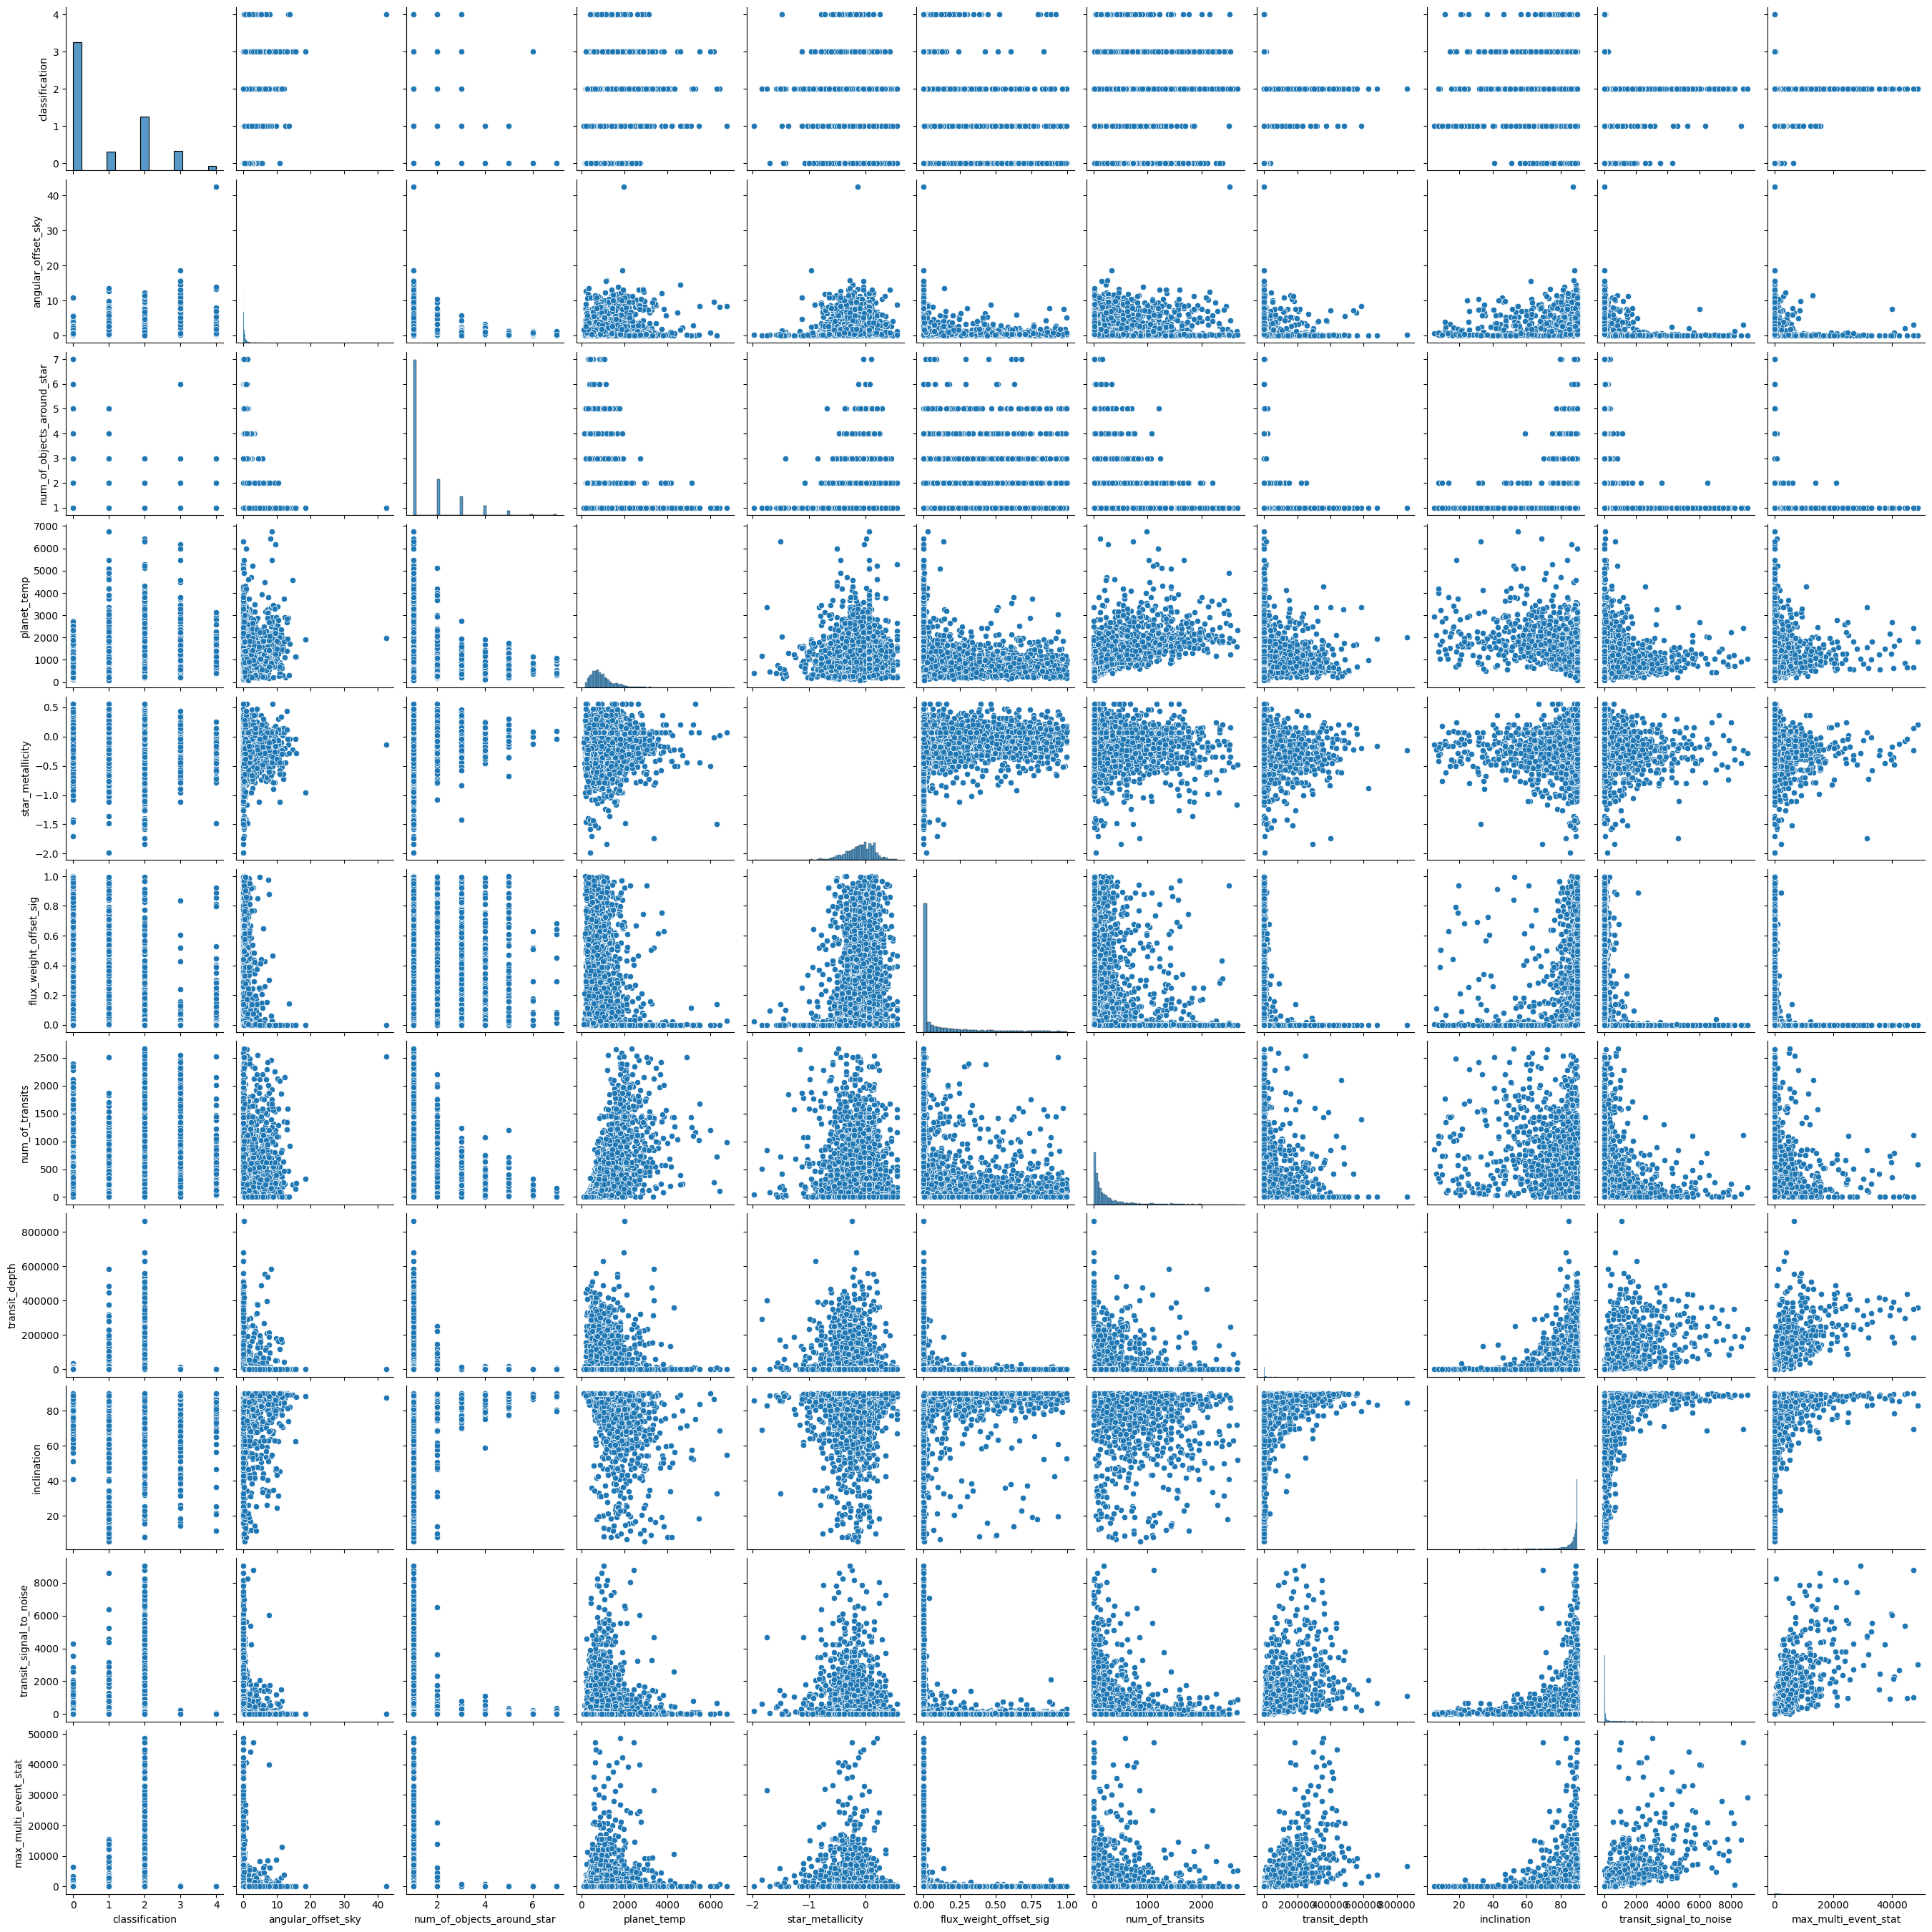

In [21]:
sns.pairplot(multi_class[highest_corr_multi])

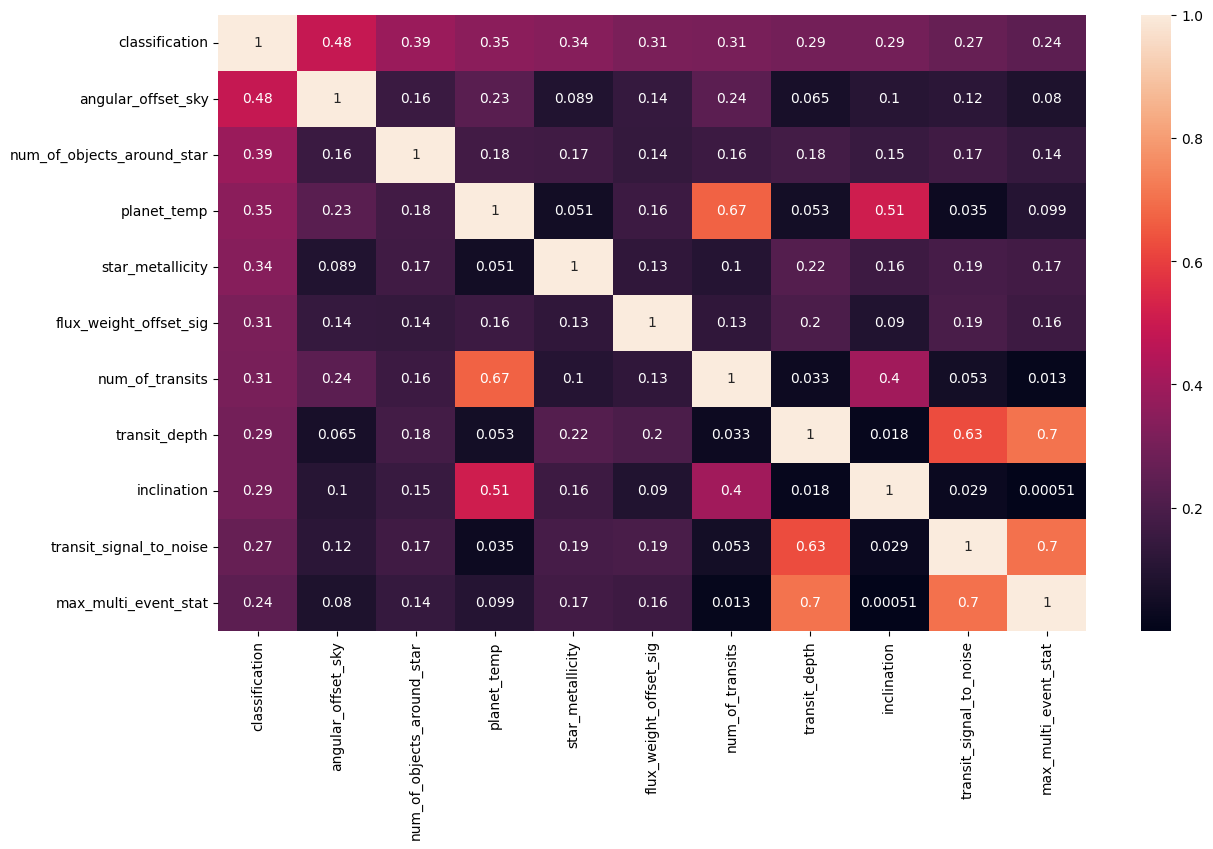

In [25]:
fig, ax = plt.subplots(figsize = (14, 8))
sns.heatmap(multi_class[highest_corr_multi].corr().abs(), annot = True, ax = ax);

In [27]:
corr_df = multi_class.corr(numeric_only = True).abs()

In [29]:
corr_df[corr_df >= 0.7]

,star_id,num_of_objects_around_star,right_ascension,declination,g_band_mag,r_band_mag,i_band_mag,z_band_mag,j_band_mag,h_band_mag,...,centroid_right_ascension_offset,centroid_declination_offset,planet_star_right_ascension_offset,planet_star_declination_offset,angular_offset_right_ascension,angular_offset_declination,angular_offset_sky,insolation_flux,star_density,classification
star_id,1.000000,NaN,NaN,0.993642,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_of_objects_around_star,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
right_ascension,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
declination,0.993642,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
g_band_mag,NaN,NaN,NaN,NaN,1.000000,0.987024,0.966082,0.947280,0.915209,0.872117,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
r_band_mag,NaN,NaN,NaN,NaN,0.987024,1.000000,0.994312,0.985099,0.966468,0.937667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
i_band_mag,NaN,NaN,NaN,NaN,0.966082,0.994312,1.000000,0.997508,0.987405,0.967382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
z_band_mag,NaN,NaN,NaN,NaN,0.947280,0.985099,0.997508,1.000000,0.995209,0.981121,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
j_band_mag,NaN,NaN,NaN,NaN,0.915209,0.966468,0.987405,0.995209,1.000000,0.994391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
h_band_mag,NaN,NaN,NaN,NaN,0.872117,0.937667,0.967382,0.981121,0.994391,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
multi_class.classification.value_counts()

0    2427
2    1017
3     374
1     353
4      89
Name: classification, dtype: int64

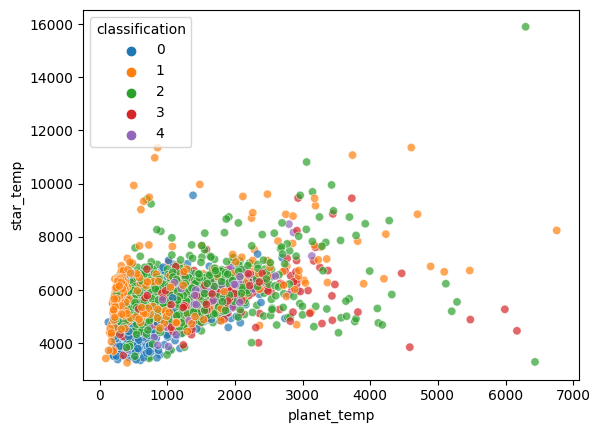

In [40]:
sns.scatterplot(multi_class, x = 'planet_temp', y = 'star_temp', hue = 'classification', palette = 'tab10', alpha = 0.7);

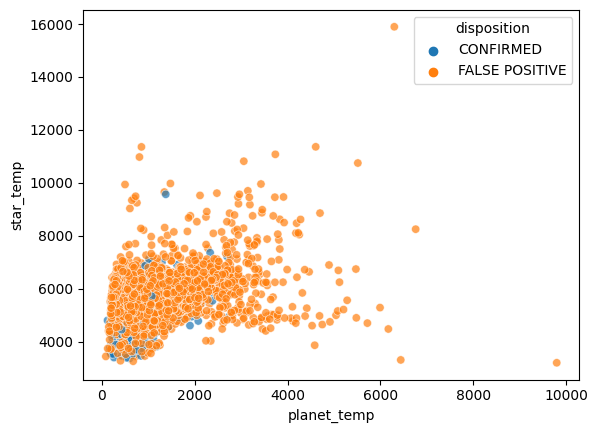

In [39]:
sns.scatterplot(binary_class, x = 'planet_temp', y = 'star_temp', hue = 'disposition', palette = 'tab10', alpha = 0.7);

In [38]:
binary_class.disposition.value_counts()

FALSE POSITIVE    2938
CONFIRMED         2427
Name: disposition, dtype: int64

In [41]:
scaler = StandardScaler()
scaler.fit(binary_class)

ValueError: could not convert string to float: 'CONFIRMED'

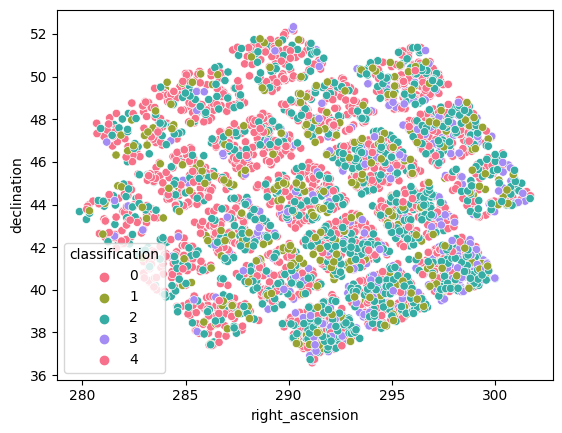

In [45]:
sns.scatterplot(multi_class, x = 'right_ascension', y = 'declination', hue = 'classification', palette = 'husl');

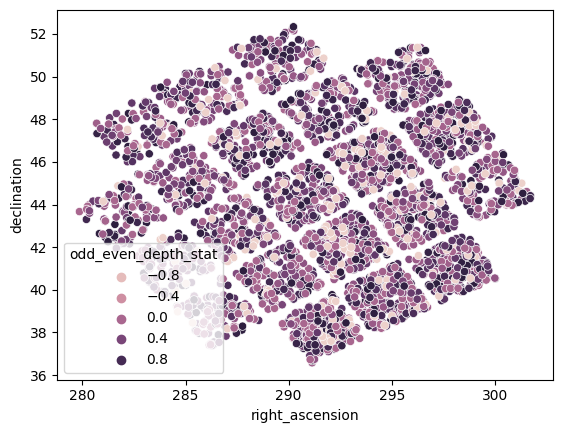

In [46]:
sns.scatterplot(multi_class, x = 'right_ascension', y = 'declination', hue = 'odd_even_depth_stat');

In [75]:
multi_class.columns[:-1]

Index(['ml_fittype', 'star_id', 'num_of_objects_around_star',
       'right_ascension', 'declination', 'g_band_mag', 'r_band_mag',
       'i_band_mag', 'z_band_mag', 'j_band_mag', 'h_band_mag', 'k_band_mag',
       'kepler_band_mag', 'num_of_transits', 'max_single_event_stat',
       'max_multi_event_stat', 'odd_even_depth_stat', 'limb_dark_co4',
       'limb_dark_co3', 'limb_dark_co2', 'limb_dark_co1',
       'transit_signal_to_noise', 'transit_epoch', 'planet_radius_earth',
       'orbit_semimajor_axis', 'impact', 'transit_duration', 'transit_depth',
       'orbital_period', 'planet_star_radius_ratio',
       'planet_star_distance_radius', 'inclination', 'planet_temp',
       'star_temp', 'star_surface_gravity', 'star_metallicity', 'star_radius',
       'star_mass', 'flux_weight_offset_sig', 'centroid_right_ascension',
       'centroid_declination', 'centroid_right_ascension_offset',
       'centroid_declination_offset', 'planet_star_right_ascension_offset',
       'planet_star_decli

In [81]:
multi_class.ml_fittype.value_counts()

LS+MCMC    4221
LS           39
Name: ml_fittype, dtype: int64

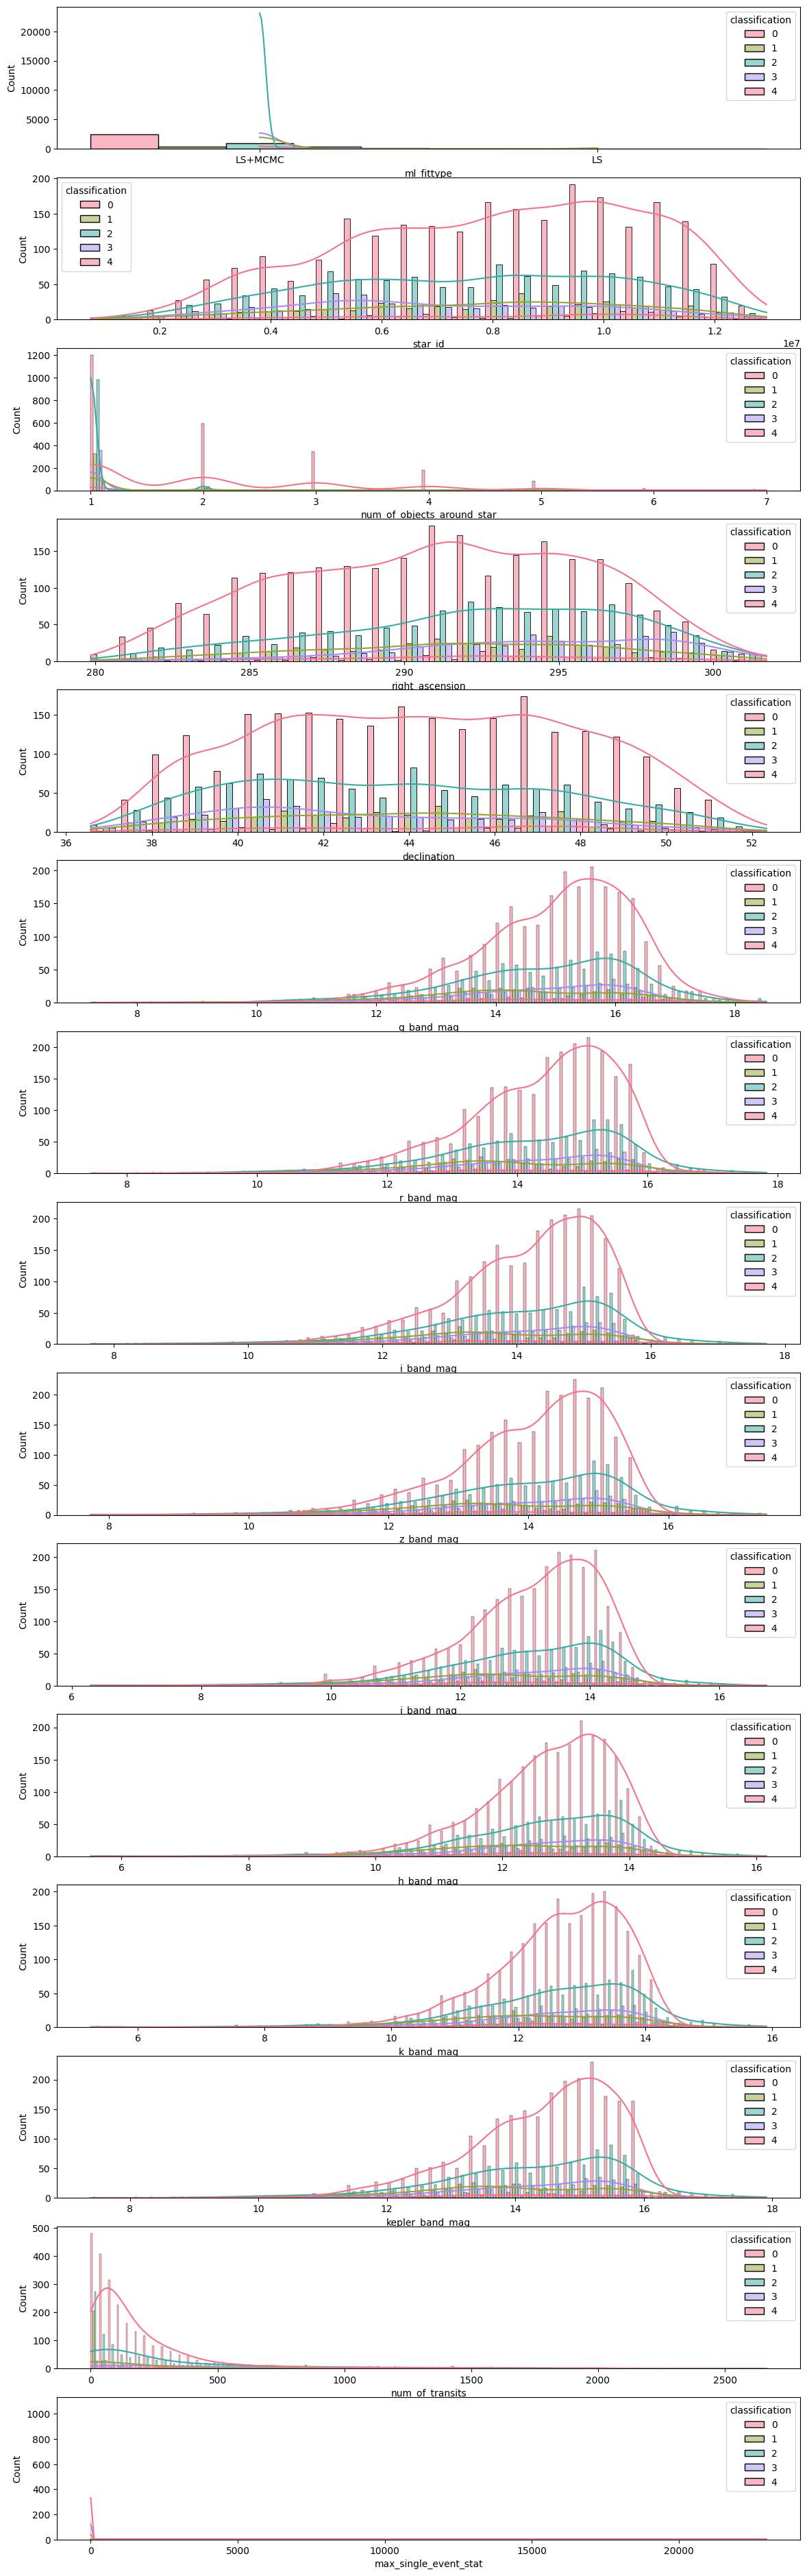

In [87]:
fig, ax = plt.subplots(15, 1, figsize = (14, 48))

for i, col in enumerate(multi_class.columns.values.tolist()[0:15]):
    sns.histplot(multi_class, x = col, kde = True,
                 hue = 'classification', multiple = 'dodge',
                 palette = 'husl',
                 ax = ax[i])


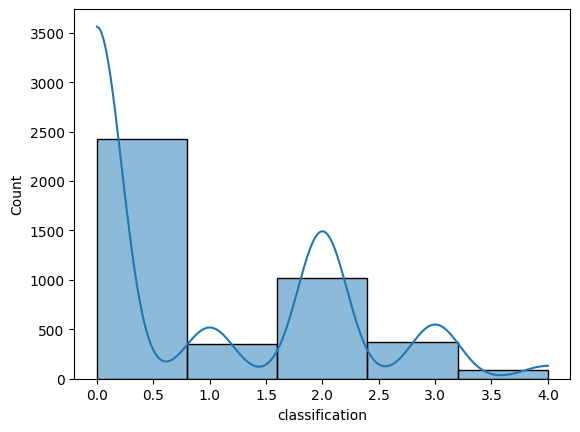

In [51]:
sns.histplot(multi_class, x = 'classification', bins = 5, kde = True);

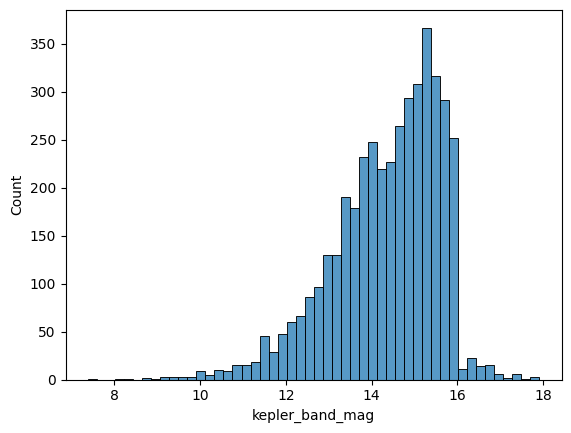

In [53]:
sns.histplot(multi_class, x = 'kepler_band_mag');

In [55]:
multi_class.star_temp.value_counts()

6063.0    16
5497.0    15
5616.0    15
5527.0    14
5970.0    14
          ..
4882.0     1
5247.0     1
6432.0     1
5656.0     1
3439.0     1
Name: star_temp, Length: 1694, dtype: int64

In [57]:
X_bin = binary_class.drop('disposition', axis = 1)
y_bin = binary_class.disposition

In [58]:
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size = 0.2, random_state = 42)

In [59]:
X_train_bin.drop('star_id', axis = 1, inplace = True)
X_test_bin.drop('star_id', axis = 1, inplace = True)

In [71]:
steps = [('lec', LabelEncoder()), ('ohe', OneHotEncoder()), ('ssc', StandardScaler()), ('logreg', LogisticRegression())]
logistic_pipe = Pipeline(steps)

In [72]:
logistic_pipe.fit(X_train_bin, y_train_bin)
logistic_pipe.score(X_test_bin, y_test_bin)

TypeError: fit_transform() takes 2 positional arguments but 3 were given